In [ ]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal -q
!apt install python3-rtree -q
!pip install geopandas -q
!pip install descartes -q

# Folium 
!pip install folium -q

# for rasters
!pip install Rasterio -q
!pip install rasterstats -q
!pip install georasters -q

# Install Pysal - Spatial Statistics
!pip install pysal -q
!pip install splot -q

# For data analysis
!pip install dataprep -q

In [143]:
import os, zipfile, glob
import rasterio,  gdal
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterstats
import numpy as np
from rasterio.plot import show
from rasterio.plot import show_hist
from shapely.geometry import Point
from dataprep.clean import clean_lat_long
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint

In [25]:
# Supplementary material
url = 'https://github.com/yodavo/moja-global-analysis/blob/fb5cb416f802ca5668d9c991821ce8c45e69bc61/2021-12-08_Task0-MOESM/datasets/13021_2019_136_MOESM2_ESM.xlsx?raw=true'
xl = pd.ExcelFile(url)

In [26]:
# sheet view
xl.sheet_names

['Data for analysis',
 'Data sources',
 'Notes and codes',
 'Genus and family',
 'Locations',
 'WClim data',
 'Sheet3']

In [108]:
# Useful datasets
dataset = [pd.read_excel(url, na_values=['.', -99], sheet_name = 'Data for analysis', skipfooter=1),
           pd.read_excel(url, na_values=['.', -99, 'na'], sheet_name = 'Genus and family'),
           pd.read_excel(url, na_values=['.', -99, 'na'], sheet_name = 'Locations'), 
           pd.read_excel(url, na_values=['.', -99, 'na'], sheet_name = 'WClim data', skiprows=4)]

In [109]:
# cleaning and fixing mistakes from excelf
dataset_clean = []
for i in dataset:
  # turn headers into lowercase and remove white spaces
  i.rename(columns=lambda x: x.strip(), inplace=True)
  i.rename(columns=lambda x: str.lower(x), inplace=True)
  i.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
  i.rename(columns=lambda x: x.replace('_c_', 'c'), inplace=True)
  i.rename(columns=lambda x: x.replace('_(', '('), inplace=True)
  # clean empty columns
  i = i.loc[:,~i.columns.str.contains('^unnamed', case=False)]
  # review header and tail to avoid empty rows
  # display(i.head(3))
  # display(i.tail(3))
  # append
  dataset_clean.append(i)

# **PAPER SUMMARY - NOTES**

## **Objective**
> **Refine the understanding of how recent increases in tree mortality could affect the global carbon balance.**

## **Methods**
1. Review what is currently known about the decomposition of *coarse woody detritus* (CWD) in boreal, temperate and tropical forests.
2. Examinating general factors that influence the rate at which CWD decomposes including tree species, size, position (i.e., standing versus downed), canopy openness, and climate.
3. Explore the implications of observed decomposition rates on modeling carbon release, examine a range of current modeling approaches, and make suggestions for the next steps in quantifying and modeling this important process.

## **Data Sources**
- Published studies of decomposition rates we selected those based for the most part on individual pieces of CWD.
- Unpublished data we used our own databases which have been gathered over the course of several decades.
- Estimates based on the ratio of mortality and an assumption that the observed store was in  steady-state.
- Site description data when provided by the articles.
- Not inventories of stores/stock [39] or models [40-43].

For a **populations of dead woods** one may estimate the decomposition rates constants from the ratio of dead wood input to stores.

**Climate** was characterized by mean annual temperature (MAT) and average total annual precipitation (TAP). Also but not primary Worldclim2 at 2.5 min data.

## **1. Rate of decomposition**

<center>
$M_{t} = Mo_{e}^{-tk}$
</center>

- **M** is the metric of choice (mass, volume, or density).
- **t** is time.
- **k** is the rate-constant of decomposition.

## **Analysis**
Analysis of all **k values** found, because the rate-constants calculated from these different combinations differ less than between studies (*ceteris paribus*) or species.

Using alternative methods to document the effect of the factors of interest:
1. Noted whether a factor had been examined and an effect had been reported.
2. Quantify the sign and magnitude of the effect.
3. For:
  - *Species effects*, using the ratio of the fastest to the slowest decomposition-rate constant.
  - *Position effects*, used the ratio of standing dead to downed dead decomposition rate-constant as the index.
  - *Size*, only noted the sign of the effect given that range of sizes examined was so variable that a comparison of magnitude could be misleading.
  - *Comparison of open-versus closed-canopy sites*, noted the sign of the effect in part because there were few studies that actually made this comparison and hence an average magnitude would be too uncertain.

In the case of **three variables**, initial wood density (IWD), MAT, and TAP, it was possible to use regression analysis to assess an effect; however, even here caution must be exercised in interpretation as many other factors (e.g., species decay resistance, size, and position) could be confounded with these variables.

1. **IWD** - statistical models we used linear regression (assess for the k estimates associated with IWD to asses relationship between all the dataset and each major forest).
2. **TAP** - liear an polynomial regression (asees relationships with k and did not examine the effect of seasonality).
3. **MAT** - Non linear regression (to determinine the Q10 -Quotient 10- for the whole dataset vs the downed CWD).

Used a sensitivity analysis to explore the potential effects of species differences and the transfer of CWD from one position (standing) to another (downed).

Two aspects of species effects were examined: the difference among species in terms of 
1. **k**
2. **abundance**

It was modelled decomposition for a total of 10 “species” with a ratio of fastest to slowest *k*  ranging between either 1, 2, 4, 8, or 16.

The first ratio indicated all species had identical k’s, whereas the latter indicated up to a 16-fold difference among species.

Five different abundance patterns of species were assessed: 
1. **uniform** (i.e., all the species contributed the same amount of input).
2. **normal distribution** in which the species with average k’s made the greatest contribution
3. **Bimodal distribution** in which fastest and slowest decomposing species made the greatest contribution.
4. **“slow” biased distribution** in which slowest decomposing species made the greatest contribution.
5. **“fast” biased distribution** in which the
fastest decomposing species made the greatest contribution.

To assess the effects of variation in *k* and species abundance we used the relative difference in carbon flux between a particular case and the reference case in which all species had the same *k*.

It was assumed that the k of maximum decomposition of snags was 0.05 per year (due time frames 15-30-60 years).

**Slags decomopse < logs**

Finally:
1. There where 2 pools (dead and live).
2. The NPP base-level was assumed to be 2 MgC/ha/year.
3. The mortality base-level was assumed to be 0.01 per year, (maximum tree life-span -majority - of 460 years). 
4. Three base-levels of decomposition rate-constants were used: 0.025, 0.05, and 0.1.
5. NEP was calculated as NPP minusd ecomposition-related losses which were assumed to be primarily from respiration.

## **Bases of decomposition**
The course of decomposition can be described using volume, mass, or density loss of a piece of CWD; moreover, different equation types can be used to determine a rate of loss.

There are three basic methods for determining decomposition rates of individual CWD pieces and each may give a different estimate:
1. **Chronosequences** (the most common) substitution in time.
2. **Time series** individual pieces over time.
3. **Decomposition vector** combined chronosequences and time series (in a wide ranges of ages over two points in time).


# **Results**

In [89]:
# check column names
dataframe = []
for i in dataset_clean:
  dataframe.append(i.columns.tolist())

# show colums in df
pd.DataFrame(dataframe)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,genus,species,subspecies,family,climate_zone,forest_type,positon,diameters(cm),model_type,target_variable,k(per_year),stderr_k(per_year),decay_resistance,initial_density(mg_per_m_cubed),reported_precipitation(mm_per_year),reported_temperature(c),wc_precipitation(mm_per_year),wc_temperature(c),reference,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,genus,family,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,location,forest_type,latitude,longitude,reference,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,oid_,location,forest_typ,latitude,longitude,reference,y,x,comments,wc2_p01,wc2_p02,wc2_p03,wc2_p04,wc2_p05,wc2_p06,wc2_p07,wc2_p08,wc2_p09,wc2_p10,wc2_p11,wc2_p12,wc2_tavg01,wc2_tavg02,wc2_tavg03,wc2_tavg04,wc2_tavg05,wc2_tavg06,wc2_tavg07,wc2_tavg08,wc2_tavg09,wc2_tavg10,wc2_tavg11,wc2_tavg12


# Location of study sites

In [171]:
# getting the information from dataset
locations = dataset_clean[2].copy()

# fixing coordenates white spaces
df_obj = locations.select_dtypes(['object'])
locations[df_obj.columns] = df_obj.apply(lambda x: x.str.rstrip())

# get values

# longitude = locations['longitude'].cppy
# locations['longitude'] = clean_lat_long(locations['longitude'])
# locations['longitude'] = locations['longitude'].str.split(r'W|N| ').str.get(0)
# locations['longitude'] = locations['longitude'].astype(float)
# locations['latitude'] = locations['latitude'].str.split(r'W|N| ').str.get(0)
# locations['latitude'] = locations['latitude'].astype(float)

# # creating geometry
# geometry = [Point(xy) for xy in zip(locations['longitude'], locations['latitude'])]
# locations = locations.drop(columns=['latitude', 'longitude', 'reference']) # removing from df

# # creating geodataframe
# glocation = gpd.GeoDataFrame(locations, crs="EPSG:4326", geometry=geometry)
# glocation.plot()

In [181]:
from dataprep.clean import validate_lat_long

locations['longitude']
locations['longitude'][~validate_lat_long(locations['latitude'], lat_long=False, lat=True)]

47    52.00 N
48    57.00 N
Name: longitude, dtype: object

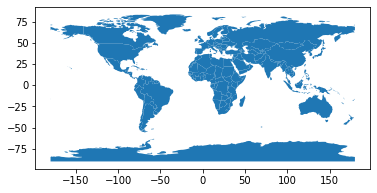

In [129]:
# geodataframes worldwide border
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_df.plot()
plt.show()

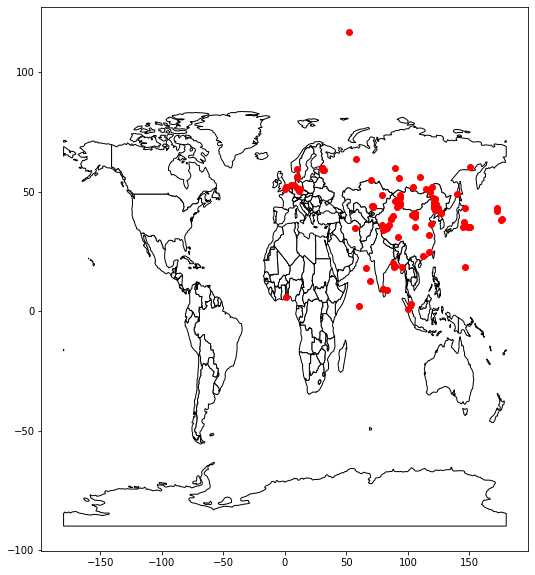

In [134]:
# plotting
ax = world_df.plot(figsize=(20,10), color='w', edgecolor='k')
glocation.plot(ax=ax, color='r')

In [115]:
locations['latitude']

0      43.03
1      43.25
2         41
3      44.01
4      43.73
       ...  
106     35.4
107    12.58
108      1.0
109    18.58
110     18.5
Name: latitude, Length: 111, dtype: object

# Climate

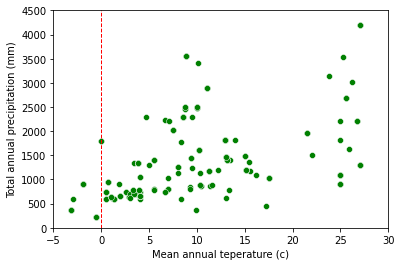

In [86]:
# Climarit conditions of decomposition studies for coarse worry detritus based
# on climate reported studies
# data = dataset_clean[0].copy()
# points = data[['reported_temperature(c)', 'reported_precipitation(mm_per_year)']].copy()

#plot
fig, ax = plt.subplots(1,1)
ax = sns.scatterplot(data=data, 
                x='reported_temperature(c)', 
                y='reported_precipitation(mm_per_year)',
                color='green')
ax.set(xlabel='Mean annual teperature (c)', ylabel='Total annual precipitation (mm)',
       xlim=(-5,30),ylim=(0,4500))
plt.axvline(0, linewidth=1, color='r',linestyle='--')
plt.show()

**Note**... quite different than the one described in the paper.

In [ ]:
display(data.shape)
data.dropna(axis=0, how='all', inplace=True)
data = data.head(295)
data.drop(columns= ['Unnamed: 19'], inplace=True)
display(data.shape)